In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

In [ ]:
col_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
data = pd.read_csv('/content/diabetes.csv', header =0,names =col_names)
print(data.shape)
data.head()

(768, 9)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.isnull().sum()

,0
pregnant,0
glucose,0
bp,0
skin,0
insulin,0
bmi,0
pedigree,0
age,0
label,0


In [ ]:
feature_cols = ['pregnant','insulin','bmi','age','glucose','bp','pedigree']
x = data[feature_cols]
y = data.label

In [ ]:
x_train, x_test, y_train,y_test = train_test_split(x,y ,test_size =0.3 , random_state=5)

display(x_train.shape,y_train.shape,x_train.shape,y_test.shape)

(537, 7)

(537,)

(537, 7)

(231,)

In [ ]:
model = LogisticRegression(solver = 'lbfgs' , max_iter = 1000)

In [ ]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ',conf_mat)
Accuracy_score = metrics.accuracy_score(y_test,y_pred)
print('Accuracy score: ',Accuracy_score)
print("Accuracy in Percentage: ",int(Accuracy_score*100),'%')

Confusion Matrix:  [[133  27]
 [ 23  48]]
Accuracy score:  0.7835497835497836
Accuracy in Percentage:  78 %


<Axes: xlabel='Predicted', ylabel='Actual'>

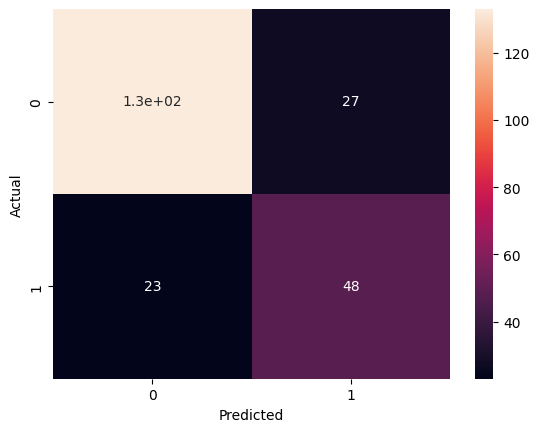

In [ ]:
conf_mat = pd.crosstab(y_test, y_pred, rownames = ["Actual"], colnames = ["Predicted"])
sn.heatmap(conf_mat, annot= True)